In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
sns.set_style("ticks")

In [3]:
data = pd.read_csv('/home/steve/Documents/ENSAE/Projet_ML_Tennis/Data/tennis_atp-master/atp_matches_2010.csv')
for annee in range(2000, 2020):
    data = pd.concat([data, pd.read_csv('/home/steve/Documents/ENSAE/Projet_ML_Tennis/Data/tennis_atp-master/atp_matches_'+str(annee)+'.csv')], axis=0)

In [4]:
data['tourney_date'] = pd.to_datetime(data['tourney_date'], yearfirst=True, format='%Y%m%d')

On préfère supprimer les matchs de la coupe Davis car leurs informations de ne sont pas complètes

In [5]:
data = data[~data['tourney_name'].str.startswith('Davis Cup')].copy()
data.dropna(subset=['minutes'], inplace=True)

In [6]:
data = data[~data['score'].str.contains('RET')].copy()
#On enlève les lignes des matchs gagné/perdu par abandon de l'adversaire car ils sont un biais à notre analyse

In [7]:
data_winner = data[data.columns]
data_loser = data[data.columns]

In [8]:
data_winner.rename({'winner_name':'player_name'}, inplace=True)
data_loser.rename({'loser_name':'player_name'}, inplace=True)

In [9]:
data_winner['win_lose'] = ['w' for i in range(len(data_winner))]
data_loser['win_lose'] = ['l' for i in range(len(data_loser))]

In [10]:
data_winner = data_winner.rename(columns=lambda x: re.sub('winner','player',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('^w_','player_',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('loser','opponent',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('^l_','opponent_',x))

data_loser = data_loser.rename(columns=lambda x: re.sub('loser','player',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('^l_','player_',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('winner','opponent',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('^w_','opponent_',x))

In [11]:
data = pd.concat([data_winner, data_loser], axis=0)
data.reset_index(inplace=True, drop=True)

/home/steve/anaconda3/envs/projetML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


On enlève les doublons qui ont pu se créer

In [ ]:
data.drop_duplicates(inplace=True)

In [47]:
len(data) #soit ~= 50.000 matchs

103870

In [12]:
data['year'] = data['tourney_date'].apply(lambda x: x.year)

In [48]:
data.describe()

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_ht,opponent_id,opponent_rank,opponent_rank_points,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_ht,player_id,player_rank,player_rank_points,player_svpt,year
count,103870.000000,103870.000000,103870.000000,103870.000000,103848.000000,103848.000000,103848.000000,103848.000000,103848.000000,103870.000000,103848.000000,103848.000000,103848.000000,96436.000000,103870.000000,103720.000000,103720.000000,103848.000000,103848.000000,103848.000000,103848.000000,103848.000000,103848.000000,103870.000000,103848.000000,103848.000000,103848.000000,96436.000000,103870.000000,103720.000000,103720.000000,103848.000000,103870.000000
mean,3.368730,59.614056,78.574969,106.205969,48.348981,34.413778,16.044758,12.495426,6.038710,26.420198,6.889300,4.152222,3.044122,185.507559,104817.666651,75.335066,1286.472513,80.053588,48.348981,34.413778,16.044758,12.495426,6.038710,26.420198,6.889300,4.152222,3.044122,185.507559,104817.666651,75.335066,1286.472513,80.053588,2009.107192
std,0.775567,37.630071,115.088188,39.649335,18.597314,13.777716,7.089217,4.095699,5.269885,3.843701,4.440999,3.232843,2.435019,6.875779,6686.595922,97.831195,1626.996112,28.465535,18.597314,13.777716,7.089217,4.095699,5.269885,3.843701,4.440999,3.232843,2.435019,6.875779,6686.595922,97.831195,1626.996112,28.465535,5.780289
min,3.000000,8.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.430527,0.000000,0.000000,0.000000,163.000000,100644.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.430527,0.000000,0.000000,0.000000,163.000000,100644.000000,1.000000,1.000000,0.000000,2000.000000
25%,3.000000,32.000000,14.000000,77.000000,35.000000,25.000000,11.000000,9.000000,2.000000,23.589322,4.000000,2.000000,1.000000,180.000000,103285.000000,24.000000,515.000000,59.000000,35.000000,25.000000,11.000000,9.000000,2.000000,23.589322,4.000000,2.000000,1.000000,180.000000,103285.000000,24.000000,515.000000,59.000000,2004.000000
50%,3.000000,32.000000,27.000000,98.000000,45.000000,32.000000,15.000000,11.000000,5.000000,26.286105,6.000000,4.000000,3.000000,185.000000,104026.000000,53.000000,808.000000,75.000000,45.000000,32.000000,15.000000,11.000000,5.000000,26.286105,6.000000,4.000000,3.000000,185.000000,104026.000000,53.000000,808.000000,75.000000,2009.000000
75%,3.000000,64.000000,88.000000,128.000000,58.000000,42.000000,20.000000,15.000000,8.000000,29.073238,10.000000,6.000000,4.000000,190.000000,104890.000000,92.000000,1350.000000,96.000000,58.000000,42.000000,20.000000,15.000000,8.000000,29.073238,10.000000,6.000000,4.000000,190.000000,104890.000000,92.000000,1350.000000,96.000000,2014.000000
max,5.000000,128.000000,1701.000000,1146.000000,361.000000,292.000000,101.000000,91.000000,113.000000,44.060233,34.000000,25.000000,26.000000,208.000000,208260.000000,2159.000000,16950.000000,491.000000,361.000000,292.000000,101.000000,91.000000,113.000000,44.060233,34.000000,25.000000,26.000000,208.000000,208260.000000,2159.000000,16950.000000,491.000000,2019.000000


In [13]:
def plot_time_per_player(name):
    joueur = data[data['player_name']==name]
    moyenne_joueur = joueur['minutes'].mean()
    annees = joueur['year'].sort_values().unique()
    moyennes_annuelles = np.zeros(annees.shape[0])
    for i, annee in enumerate(annees):
        moyennes_annuelles[i] = joueur[joueur['year']==annee]['minutes'].mean()
    plt.figure(figsize=(10,5))
    plt.plot(annees, moyennes_annuelles, color="red")
    plt.plot(annees, [moyenne_joueur for i in range(len(annees))], color='grey')
    plt.title(name)
    plt.xticks(annees.astype('int'))
    plt.tight_layout(pad=2)
    sns.despine()
    plt.show()

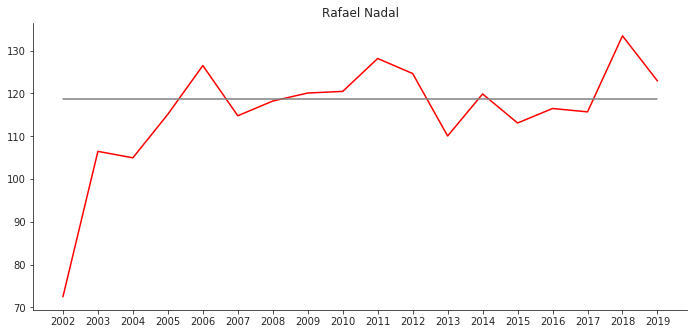

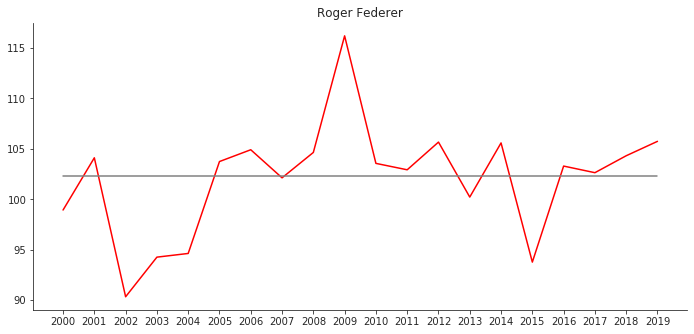

In [14]:
for i in ['Rafael Nadal', 'Roger Federer']:
    plot_time_per_player(i)

In [15]:
moyenne_globale = data['minutes'].mean()
annees = data['year'].sort_values().unique()
moyennes_annuelles = {}
for annee in annees:
    moyennes_annuelles[annee] = data[data['year']==annee]['minutes'].mean()

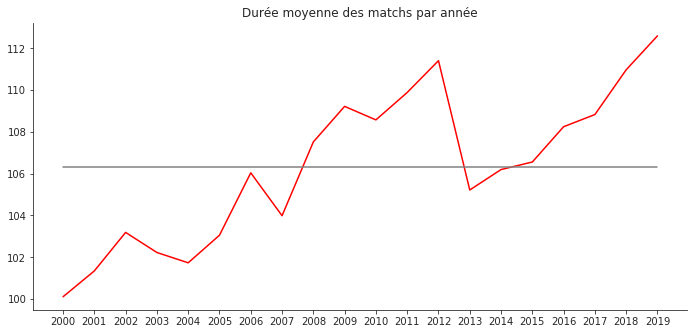

In [16]:
plt.figure(figsize=(10,5))
plt.plot(sorted(list(moyennes_annuelles.keys())), 
         [moyennes_annuelles[annee] for annee in sorted(list(moyennes_annuelles.keys()))], 
         color="red")
plt.plot(sorted(list(moyennes_annuelles.keys())), 
         [moyenne_globale for i in range(len(moyennes_annuelles.keys()))], 
         color='grey')
plt.title('Durée moyenne des matchs par année')
plt.xticks(annees.astype('int'))
plt.tight_layout(pad=2)
sns.despine()
plt.show()

In [17]:
data.groupby('surface')['minutes'].mean()

surface
Carpet     94.345428
Clay      107.027018
Grass     112.163036
Hard      105.256740
Name: minutes, dtype: float64

In [18]:
data.head(1)

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
0,3,32,1,84.0,34.0,29.0,11.0,10.0,4.0,30.346338,5.0,3.0,2.0,NaN,R,183.0,103429,AUS,Peter Luczak,77.0,598.0,NaN,56.0,42.0,36.0,14.0,10.0,15.0,27.348392,3.0,3.0,0.0,NaN,R,188.0,104053,USA,Andy Roddick,7.0,4410.0,1,63.0,R32,7-6(5) 6-2,Hard,2010-01-03,2010-339,A,Brisbane,w,2010


In [19]:
group_tourney = data.groupby(['tourney_name'])['minutes'].mean()

In [20]:
group_tourney.nlargest(150)

tourney_name
Roland Garros           151.428683
US Open                 150.233680
Australian Open         149.962397
Wimbledon               143.051125
Pune                    111.943396
Rio De Janeiro          111.392857
Cordoba                 109.769231
Rio Olympics            107.770492
Quito                   107.613208
Sao Paulo               106.514423
Tour Finals             106.077922
Masters Cup             105.809524
Zhuhai                  105.760000
Rio de Janeiro          105.584071
Shenzhen                105.578431
Santiago                104.558140
Rome Masters            103.433105
Hamburg                 102.661972
Costa Do Sauipe         102.475645
Istanbul                102.462264
Beijing Olympics        102.442623
Buenos Aires            102.345763
Viña del Mar            101.730769
New York                101.634615
Madrid Masters          101.623751
Marrakech               101.590909
Belgrade                101.453846
Budapest                101.265823
Vienna 

In [21]:
data[data['tourney_name']=='Wimbledon']['minutes'].describe()

count    4890.000000
mean      143.051125
std        46.694731
min        54.000000
25%       108.000000
50%       135.000000
75%       170.000000
max       665.000000
Name: minutes, dtype: float64

In [22]:
data[(data['year']==2019)].groupby('surface')['minutes'].mean()

surface
Clay     113.535340
Grass    117.552050
Hard     110.914831
Name: minutes, dtype: float64

In [23]:
data[data['surface']=='Grass']['minutes']

1305       64.0
1306       97.0
1307      133.0
1308      149.0
1309       71.0
          ...  
108158     86.0
108159     44.0
108160    110.0
108161    125.0
108162    136.0
Name: minutes, Length: 11936, dtype: float64

In [24]:
data.head(1)

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
0,3,32,1,84.0,34.0,29.0,11.0,10.0,4.0,30.346338,5.0,3.0,2.0,NaN,R,183.0,103429,AUS,Peter Luczak,77.0,598.0,NaN,56.0,42.0,36.0,14.0,10.0,15.0,27.348392,3.0,3.0,0.0,NaN,R,188.0,104053,USA,Andy Roddick,7.0,4410.0,1,63.0,R32,7-6(5) 6-2,Hard,2010-01-03,2010-339,A,Brisbane,w,2010


In [25]:
data['opponent_SvGms'].unique()

array([10.,  9., 14., 12.,  7.,  8., 18., 16., 11.,  6., 15., 13., 17.,
       22., 21., 23., 19., 28., 27., 24., 20., 25., 30., 34., 26., 31.,
       37., 91., 29.,  3.,  5.,  4., 40., 32., 33., 41., 35.,  0., 36.,
       nan, 38.,  2., 39., 50., 90., 42., 49.])

In [26]:
data.head()

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
0,3,32,1,84.0,34.0,29.0,11.0,10.0,4.0,30.346338,5.0,3.0,2.0,NaN,R,183.0,103429,AUS,Peter Luczak,77.0,598.0,NaN,56.0,42.0,36.0,14.0,10.0,15.0,27.348392,3.0,3.0,0.0,NaN,R,188.0,104053,USA,Andy Roddick,7.0,4410.0,1,63.0,R32,7-6(5) 6-2,Hard,2010-01-03,2010-339,A,Brisbane,w,2010
1,3,32,2,70.0,34.0,22.0,14.0,9.0,2.0,22.370979,10.0,7.0,2.0,NaN,L,190.0,104999,GER,Mischa Zverev,78.0,590.0,NaN,66.0,30.0,23.0,19.0,10.0,10.0,22.543463,0.0,0.0,3.0,WC,L,198.0,104958,AUS,Carsten Ball,134.0,400.0,NaN,57.0,R32,7-5 6-1,Hard,2010-01-03,2010-339,A,Brisbane,w,2010
2,3,32,3,121.0,58.0,38.0,14.0,14.0,4.0,28.451745,11.0,7.0,0.0,NaN,L,185.0,103813,FIN,Jarkko Nieminen,88.0,568.0,NaN,85.0,51.0,33.0,27.0,15.0,5.0,23.548255,8.0,5.0,4.0,NaN,R,185.0,104755,FRA,Richard Gasquet,52.0,850.0,NaN,97.0,R32,6-3 4-6 6-4,Hard,2010-01-03,2010-339,A,Brisbane,w,2010
3,3,32,4,64.0,29.0,16.0,15.0,9.0,2.0,28.621492,5.0,2.0,1.0,NaN,L,183.0,103781,AUT,Jurgen Melzer,28.0,1260.0,6,53.0,35.0,30.0,12.0,10.0,12.0,22.108145,3.0,3.0,1.0,Q,R,188.0,105051,AUS,Matthew Ebden,285.0,151.0,NaN,50.0,R32,7-5 6-1,Hard,2010-01-03,2010-339,A,Brisbane,w,2010
4,3,32,5,69.0,41.0,26.0,14.0,9.0,6.0,21.429158,9.0,6.0,1.0,Q,R,183.0,105194,AUS,Nick Lindahl,251.0,179.0,NaN,69.0,27.0,24.0,14.0,9.0,3.0,24.298426,1.0,1.0,1.0,NaN,R,196.0,104607,CZE,Tomas Berdych,20.0,1655.0,4,46.0,R32,6-2 6-4,Hard,2010-01-03,2010-339,A,Brisbane,w,2010


In [27]:
tmp = data.iloc[0]['score'].split(' ')

In [28]:
[x.split('-') for x in tmp]

[['7', '6(5)'], ['6', '2']]

In [29]:
data['player_bpFaced'].describe()

count    109032.000000
mean          6.880255
std           4.432823
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          34.000000
Name: player_bpFaced, dtype: float64

In [30]:
data['player_bpFaced'].describe()

count    109032.000000
mean          6.880255
std           4.432823
min           0.000000
25%           4.000000
50%           6.000000
75%          10.000000
max          34.000000
Name: player_bpFaced, dtype: float64

In [31]:
data['score'].describe()

count      109054
unique       8431
top       6-3 6-4
freq         3940
Name: score, dtype: object

In [32]:
len(data.score[0].split(' '))

2

In [33]:
data.groupby(['tourney_name', 'surface', 'best_of'])['minutes'].mean()

tourney_name          surface  best_of
's-Hertogenbosch      Grass    3           90.801630
ATP Next Gen Finals   Hard     3           89.125000
Acapulco              Clay     3          101.980583
                      Hard     3           96.703911
Adelaide              Hard     3           88.978648
Amersfoort            Clay     3           95.044554
                               5          145.000000
Amsterdam             Clay     3           92.355932
                               5          187.500000
Antalya               Grass    3          100.769231
Antwerp               Hard     3           99.365385
Atlanta               Clay     3           87.500000
                      Hard     3          100.708333
Auckland              Hard     3           91.739726
Australian Open       Hard     5          149.962397
Bangkok               Hard     3           95.091988
Barcelona             Clay     3           99.663462
                               5          169.833333
Basel  

In [34]:
data.groupby(['best_of'])['minutes'].mean()

best_of
3     96.714723
5    148.779181
Name: minutes, dtype: float64

In [35]:
data.groupby(['best_of', 'surface'])['minutes'].mean()

best_of  surface
3        Carpet      93.687683
         Clay        99.426182
         Grass       90.719194
         Hard        96.044820
5        Carpet     158.428571
         Clay       151.675365
         Grass      143.040065
         Hard       150.052284
Name: minutes, dtype: float64

In [36]:
data.groupby(['best_of', 'surface'])['surface'].count()

best_of  surface
3        Carpet      2728
         Clay       30616
         Grass       7044
         Hard       48550
5        Carpet        28
         Clay        5212
         Grass       4892
         Hard        9984
Name: surface, dtype: int64

In [37]:
data.groupby(['surface'])['minutes'].mean()

surface
Carpet     94.345428
Clay      107.027018
Grass     112.163036
Hard      105.256740
Name: minutes, dtype: float64

In [38]:
data[data['surface']=='Grass'].describe()

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_ht,opponent_id,opponent_rank,opponent_rank_points,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_ht,player_id,player_rank,player_rank_points,player_svpt,year
count,11936.000000,11936.000000,11936.000000,11936.000000,11930.000000,11930.000000,11930.000000,11930.000000,11930.000000,11936.000000,11930.000000,11930.000000,11930.000000,11106.000000,11936.000000,11920.000000,11920.000000,11930.000000,11930.000000,11930.000000,11930.000000,11930.000000,11930.000000,11936.000000,11930.000000,11930.000000,11930.000000,11106.000000,11936.000000,11920.000000,11920.000000,11930.000000,11936.000000
mean,3.819705,75.164209,79.866287,112.163036,56.245264,41.608885,17.748533,14.356329,8.573512,26.742755,6.762867,4.241324,3.607209,186.082478,104841.951491,85.486074,1212.522735,90.631936,56.245264,41.608885,17.748533,14.356329,8.573512,26.742755,6.762867,4.241324,3.607209,186.082478,104841.951491,85.486074,1212.522735,90.631936,2009.367627
std,0.983654,44.875741,91.140918,44.859997,23.015823,17.634964,7.857369,5.242899,6.877758,4.013155,4.539542,3.351989,2.795086,7.077181,7055.463321,104.947980,1608.650310,34.498800,23.015823,17.634964,7.857369,5.242899,6.877758,4.013155,4.539542,3.351989,2.795086,7.077181,7055.463321,104.947980,1608.650310,34.498800,5.667677
min,3.000000,28.000000,1.000000,39.000000,15.000000,6.000000,1.000000,6.000000,0.000000,15.430527,0.000000,0.000000,0.000000,163.000000,100644.000000,1.000000,1.000000,31.000000,15.000000,6.000000,1.000000,6.000000,0.000000,15.430527,0.000000,0.000000,0.000000,163.000000,100644.000000,1.000000,1.000000,31.000000,2000.000000
25%,3.000000,32.000000,17.000000,79.000000,39.000000,29.000000,12.000000,10.000000,4.000000,23.758385,3.000000,2.000000,2.000000,183.000000,103319.000000,29.000000,461.000000,65.000000,39.000000,29.000000,12.000000,10.000000,4.000000,23.758385,3.000000,2.000000,2.000000,183.000000,103319.000000,29.000000,461.000000,65.000000,2005.000000
50%,3.000000,56.000000,36.000000,104.000000,52.000000,39.000000,16.000000,14.000000,7.000000,26.592745,6.000000,4.000000,3.000000,185.000000,104068.000000,62.000000,737.000000,85.000000,52.000000,39.000000,16.000000,14.000000,7.000000,26.592745,6.000000,4.000000,3.000000,185.000000,104068.000000,62.000000,737.000000,85.000000,2010.000000
75%,5.000000,128.000000,110.000000,135.000000,68.000000,51.000000,22.000000,17.000000,12.000000,29.481862,9.750000,6.000000,5.000000,190.000000,104890.000000,103.000000,1230.000000,109.000000,68.000000,51.000000,22.000000,17.000000,12.000000,29.481862,9.750000,6.000000,5.000000,190.000000,104890.000000,103.000000,1230.000000,109.000000,2014.000000
max,5.000000,128.000000,300.000000,665.000000,361.000000,292.000000,101.000000,91.000000,113.000000,40.375086,29.000000,24.000000,22.000000,208.000000,206703.000000,2159.000000,16950.000000,491.000000,361.000000,292.000000,101.000000,91.000000,113.000000,40.375086,29.000000,24.000000,22.000000,208.000000,206703.000000,2159.000000,16950.000000,491.000000,2019.000000


In [43]:
data.drop_duplicates(inplace=True)

In [69]:
data[data['surface']=='Grass']['minutes'].nlargest(50)

1501      665.0
56028     665.0
51052     396.0
105579    396.0
37001     331.0
91528     331.0
51053     315.0
105580    315.0
27055     312.0
81582     312.0
24459     300.0
78986     300.0
4869      299.0
59396     299.0
53582     297.0
108109    297.0
21635     296.0
76162     296.0
36904     293.0
91431     293.0
27059     288.0
36945     288.0
48491     288.0
51051     288.0
81586     288.0
91472     288.0
103018    288.0
105578    288.0
39568     283.0
94095     283.0
1553      276.0
56080     276.0
13166     273.0
67693     273.0
13230     268.0
29704     268.0
67757     268.0
84231     268.0
37328     266.0
91855     266.0
45927     264.0
48404     264.0
51046     264.0
100454    264.0
102931    264.0
105573    264.0
13259     263.0
67786     263.0
10500     261.0
21652     261.0
Name: minutes, dtype: float64

In [70]:
data.loc[105579]

best_of                                              5
draw_size                                          128
match_num                                          224
minutes                                            396
opponent_1stIn                                     198
opponent_1stWon                                    166
opponent_2ndWon                                     47
opponent_SvGms                                      49
opponent_ace                                        49
opponent_age                                   32.1232
opponent_bpFaced                                     5
opponent_bpSaved                                     3
opponent_df                                          4
opponent_entry                                     NaN
opponent_hand                                        R
opponent_ht                                        203
opponent_id                                     104731
opponent_ioc                                       RSA
opponent_n

In [49]:
data[data['surface']=='Clay']['minutes'].nlargest(50)

47941     987.0
102468    987.0
15832     393.0
70359     393.0
36726     341.0
91253     341.0
17861     314.0
72388     314.0
53282     309.0
107809    309.0
20714     305.0
75241     305.0
18715     304.0
73242     304.0
19882     300.0
74409     300.0
1206      296.0
55733     296.0
21566     293.0
76093     293.0
7546      291.0
62073     291.0
21525     290.0
36672     290.0
76052     290.0
91199     290.0
13123     281.0
67650     281.0
13106     279.0
67633     279.0
1271      278.0
55798     278.0
15841     277.0
36741     277.0
39287     277.0
39313     277.0
70368     277.0
91268     277.0
93814     277.0
93840     277.0
18634     275.0
73161     275.0
29527     274.0
39217     274.0
39260     274.0
48219     274.0
84054     274.0
93744     274.0
93787     274.0
102746    274.0
Name: minutes, dtype: float64

In [74]:
data.loc[47941]

best_of                                   3
draw_size                                32
match_num                               297
minutes                                 987
opponent_1stIn                           49
opponent_1stWon                          28
opponent_2ndWon                          27
opponent_SvGms                           14
opponent_ace                              8
opponent_age                        27.8056
opponent_bpFaced                         12
opponent_bpSaved                          8
opponent_df                               4
opponent_entry                          NaN
opponent_hand                             L
opponent_ht                             190
opponent_id                          105373
opponent_ioc                            SVK
opponent_name                 Martin Klizan
opponent_rank                            53
opponent_rank_points                    880
opponent_seed                           NaN
opponent_svpt                   

In [73]:
data[data['surface']=='Hard']['minutes'].nlargest(50)

44479     1146.0
99006     1146.0
35700      353.0
90227      353.0
47118      314.0
101645     314.0
30022      310.0
84549      310.0
16115      309.0
70642      309.0
29953      307.0
29958      307.0
84480      307.0
84485      307.0
52242      305.0
106769     305.0
38282      302.0
92809      302.0
13577      300.0
68104      300.0
2087       299.0
56614      299.0
47190      296.0
101717     296.0
48969      295.0
103496     295.0
37629      294.0
46501      294.0
92156      294.0
101028     294.0
161        293.0
35593      293.0
54688      293.0
90120      293.0
38259      292.0
92786      292.0
16334      291.0
70861      291.0
35698      290.0
54112      290.0
90225      290.0
108639     290.0
51578      289.0
51667      289.0
106105     289.0
106194     289.0
22032      288.0
29818      288.0
33011      288.0
34951      288.0
Name: minutes, dtype: float64

In [52]:
data[data['surface']=='Carpet']['minutes'].nsmallest(150)

20201    35.0
74728    35.0
9899     37.0
21104    37.0
64426    37.0
75631    37.0
7125     39.0
18258    39.0
61652    39.0
72785    39.0
11774    40.0
66301    40.0
3189     42.0
57716    42.0
9062     44.0
23073    44.0
63589    44.0
77600    44.0
5871     45.0
11699    45.0
60398    45.0
66226    45.0
12605    46.0
16173    46.0
67132    46.0
70700    46.0
9300     47.0
12614    47.0
16175    47.0
24584    47.0
25700    47.0
63827    47.0
67141    47.0
70702    47.0
79111    47.0
80227    47.0
4257     48.0
9070     48.0
15387    48.0
17074    48.0
17652    48.0
58784    48.0
63597    48.0
69914    48.0
71601    48.0
72179    48.0
11520    49.0
17054    49.0
19021    49.0
21121    49.0
66047    49.0
71581    49.0
73548    49.0
75648    49.0
2987     50.0
4262     50.0
6485     50.0
16196    50.0
17307    50.0
17329    50.0
17382    50.0
19189    50.0
19911    50.0
21106    50.0
22332    50.0
57514    50.0
58789    50.0
61012    50.0
70723    50.0
71834    50.0
71856    50.0
71909 

In [56]:
data.loc[[20201, 74728, 9899, 21104, 64426, 75631, 7125, 18258]]

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
20201,3,48,21,35.0,21.0,5.0,3.0,6.0,0.0,27.874059,8.0,2.0,0.0,LL,R,170.0,103294,BEL,Christophe Rochus,68.0,561.0,NaN,34.0,21.0,20.0,4.0,6.0,9.0,25.409993,0.0,0.0,0.0,NaN,R,178.0,103786,RUS,Nikolay Davydenko,5.0,2650.0,4,29.0,R32,6-0 6-0,Carpet,2006-10-30,2006-352,M,Paris Masters,w,2006
74728,3,48,21,35.0,21.0,20.0,4.0,6.0,9.0,25.409993,0.0,0.0,0.0,NaN,R,178.0,103786,RUS,Nikolay Davydenko,5.0,2650.0,4,29.0,21.0,5.0,3.0,6.0,0.0,27.874059,8.0,2.0,0.0,LL,R,170.0,103294,BEL,Christophe Rochus,68.0,561.0,NaN,34.0,R32,6-0 6-0,Carpet,2006-10-30,2006-352,M,Paris Masters,l,2006
9899,3,32,4,37.0,19.0,10.0,4.0,6.0,1.0,23.512663,6.0,1.0,0.0,WC,L,188.0,103350,RUS,Denis Golovanov,167.0,220.0,NaN,36.0,28.0,23.0,6.0,7.0,4.0,21.144422,0.0,0.0,1.0,NaN,R,185.0,103819,SUI,Roger Federer,13.0,1925.0,5,38.0,R32,6-0 6-1,Carpet,2002-09-30,2002-438,A,Moscow,w,2002
21104,3,32,1,37.0,21.0,6.0,6.0,6.0,0.0,28.459959,10.0,4.0,1.0,NaN,R,185.0,103181,CZE,Jiri Vanek,91.0,453.0,NaN,40.0,16.0,16.0,8.0,6.0,5.0,25.352498,0.0,0.0,1.0,NaN,R,178.0,103786,RUS,Nikolay Davydenko,5.0,2590.0,1,27.0,R32,6-0 6-0,Carpet,2006-10-09,2006-438,A,Moscow,w,2006
64426,3,32,4,37.0,28.0,23.0,6.0,7.0,4.0,21.144422,0.0,0.0,1.0,NaN,R,185.0,103819,SUI,Roger Federer,13.0,1925.0,5,38.0,19.0,10.0,4.0,6.0,1.0,23.512663,6.0,1.0,0.0,WC,L,188.0,103350,RUS,Denis Golovanov,167.0,220.0,NaN,36.0,R32,6-0 6-1,Carpet,2002-09-30,2002-438,A,Moscow,l,2002
75631,3,32,1,37.0,16.0,16.0,8.0,6.0,5.0,25.352498,0.0,0.0,1.0,NaN,R,178.0,103786,RUS,Nikolay Davydenko,5.0,2590.0,1,27.0,21.0,6.0,6.0,6.0,0.0,28.459959,10.0,4.0,1.0,NaN,R,185.0,103181,CZE,Jiri Vanek,91.0,453.0,NaN,40.0,R32,6-0 6-0,Carpet,2006-10-09,2006-438,A,Moscow,l,2006
7125,3,32,14,39.0,17.0,9.0,7.0,6.0,0.0,26.603696,7.0,2.0,3.0,NaN,R,188.0,102539,CZE,Bohdan Ulihrach,34.0,1010.0,NaN,42.0,26.0,23.0,5.0,7.0,2.0,26.529774,0.0,0.0,1.0,NaN,R,190.0,102562,CZE,Jiri Novak,43.0,846.0,NaN,37.0,R32,6-1 6-0,Carpet,2001-10-01,2001-438,A,Moscow,w,2001
18258,3,32,8,39.0,28.0,12.0,2.0,6.0,1.0,28.312115,8.0,3.0,1.0,NaN,R,185.0,103009,ROU,Razvan Sabau,86.0,469.0,NaN,40.0,22.0,20.0,9.0,7.0,2.0,24.095825,1.0,1.0,4.0,NaN,R,183.0,103835,ITA,Filippo Volandri,42.0,836.0,8,38.0,R32,6-0 6-1,Carpet,2005-10-10,2005-438,A,Moscow,w,2005


In [76]:
data.loc[93153]

best_of                                    3
draw_size                                 96
match_num                                  1
minutes                                   81
opponent_1stIn                            42
opponent_1stWon                           31
opponent_2ndWon                           14
opponent_SvGms                            10
opponent_ace                               4
opponent_age                         25.7796
opponent_bpFaced                           9
opponent_bpSaved                           7
opponent_df                                1
opponent_entry                           NaN
opponent_hand                              R
opponent_ht                              178
opponent_id                           104926
opponent_ioc                             ITA
opponent_name                  Fabio Fognini
opponent_rank                             36
opponent_rank_points                    1065
opponent_seed                            NaN
opponent_s